In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [5]:
# data is now our pandas DataFrame containing all of the data from our csv file
df = pd.read_csv(ROOT_FOLDER + "eviction_with_census_tract.csv",index_col=0)

In [ ]:
df

,Unnamed: 0.1,Join_Count,TARGET_FID,Loc_name,Status,Score,Match_type,Match_addr,User_fld,Addr_type,ARC_Street,ARC_City,ARC_State,ARC_ZIP,case_numbe,court_divi,file_date,initiating,property_a,property_1,property_2,property_3,mapc_id,muni_id,muni,parloc_id,poly_typ,map_num,mappar_id,loc_id_cnt,land_value,bldg_value,othr_value,total_valu,ls_price,ls_date,bldg_area,res_area,luc_1,luc_2,...,owner_addr,owner_city,owner_stat,owner_zip,fy,lot_areaft,far,pct_imperv,pct_bldg,pct_pave,landv_pac,bldgv_psf,totv_pac,bldlnd_rat,sqm_imperv,sqm_bldg,sqm_pave,realesttyp,temp,st_area_sh,st_length_,geometry,CoreName,CleanName,Corp,EntityName,DataID,FEIN,Owner_Groups_All,Only_Groups,index_right,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,0,1,0,MAD_ADDR_POST,M,92.63,A,"159 BROOKLINE ROAD 8, TOWNSEND, MA, 01469",NaN,PointAddress,159 Brookline Road 5,Townsend,MA,1469.0,2048SU000012,ayer district,2020-11-10,Summary Process - Residential (c239),Townsend,MA,159 Brookline Road 5,1469.0,821985,299,Townsend,M_185312_938643,FEE,38,38 9 0,1,83300.0,563900.0,3700.0,650900.0,195500.0,20090831.0,4458.0,4458.0,301,301,...,15 SCALES LANE,TOWNSEND,MA,01469,2019,1.000173e+05,0.044572,31.934645,4.924409,27.010236,3.627919e+04,126.491700,2.834829e+05,6.813926,2967.338976,457.571717,2509.767258,8.0,0.0,9291.917091,436.954349,POINT (185305.2413596544 938650.9030090374),KING DANA,KING DANA,False,NaN,NaN,NaN,KING DANA,NaN,1171.0,25.0,17.0,301101.0,1400000US25017301101,2.501730e+10,3011.01,CT,44272760.0,54203.0
1,1,1,1,MAD_ADDR_POST,M,97.89,A,"21 SCHOOL STREET 3, ATTLEBORO, MA, 02703",NaN,PointAddress,21 School Street Apt 3,Attleboro,MA,2703.0,2034SU000044,attleboro district,2020-11-13,Summary Process - Residential (c239),Attleboro,MA,21 School Street Apt 3,2703.0,51329,16,Attleboro,M_218112_854353,FEE,39,39_181,1,70100.0,255000.0,0.0,325100.0,350500.0,20101018.0,6285.0,4680.0,1110,1110,...,32 STATION ST,SHARON,MA,02067,2019,2.578051e+03,2.437888,98.803573,71.631631,27.171941,1.184443e+06,40.572792,5.493047e+06,3.637660,236.643156,171.563992,65.079165,3.0,0.0,239.509129,65.749524,POINT (218112.614739474 854353.7222426279),TRUXTON RONALD D AND AHUVA F,TRUXTON RONALD D AND AHUVA F,False,NaN,NaN,NaN,TRUXTON RONALD D AND AHUVA F,NaN,389.0,25.0,5.0,631600.0,1400000US25005631600,2.500563e+10,6316.00,CT,1571486.0,23449.0
2,2,1,2,MAD_ADDR_POST,M,100.00,M,"171 ROUTE 6A, SANDWICH, MA, 02563",NaN,PointAddress,171 ROUTE 6A,SANDWICH,MA,2563.0,2025SU000057,barnstable district,2020-11-09,Summary Process - Residential (c239),Sandwich,MA,"171 Route 6A, Room 1 (Upstairs)",2563.0,2022847,261,Sandwich,F_932826_2736632,FEE,66,66-030-,1,116000.0,133400.0,5300.0,254700.0,300000.0,20041006.0,0.0,1346.0,101,101,...,171 ROUTE 6A,SANDWICH,MA,02563,2011,1.233307e+04,0.109137,18.775621,10.928205,7.847415,4.097081e+05,99.108470,8.995918e+05,1.195690,215.127232,125.213147,89.914085,1.0,0.0,1145.778535,171.797499,POINT (284312.402709826 834112.9964528072),DELLEA SUSAN A,DELLEA SUSAN A,False,NaN,NaN,NaN,DELLEA SUSAN A,NaN,57.0,25.0,1.0,13300.0,1400000US25001013300,2.500101e+10,133.00,CT,12813860.0,1665619.0
3,3,1,3,MAD_ADDR_POST,M,90.53,A,"10 THACHER BROOK CIRCLE 8, ATTLEBORO, MA, 02703",NaN,PointAddress,10 Thacher Brook Circle Apt 3,Attleboro,MA,2703.0,2034SU000043,attleboro district,2020-11-12,Summary Process - Residential (c239),Attleboro,MA,10 Thacher Brook Circle Apt 3,2703.0,58944,16,Attleboro,M_218630_853510,TAX,53,NaN,1,2722000.0,13018200.0,431300.0,16171500.0,0.0,19850101.0,12204.0,11110.0,000,000,...,7 WELLS AVE SUITE 14,NEWTON,MA,02459,2019,1.202846e+06,0.010146,26.128661,7.213033,18.915628,9.857484e+04,1066.715831,5.856367e+05,4.941036,29198.248811,8060.417943,21137.830868,0.0,0.0,111748.020917,2501.159490,POINT (218724.8575637158 853790.9962384583),ETON THAMES,ETON THAMES ASSOCIATION LIMITED,True,ETON THAMES ASSOCIATES LIMITED PARTNERSHIP,00ec9c,L86003423,00ec9c,NaN,390.0,25.0,5.0,631800.0,1400000US25005631800,2.500563e+10,6318.00,CT,12001536.0,305704.0
4,4,1,4,MAD_ADDR_

In [ ]:
#show columns
df.columns

Index(['Unnamed: 0.1', 'Join_Count', 'TARGET_FID', 'Loc_name', 'Status',
       'Score', 'Match_type', 'Match_addr', 'User_fld', 'Addr_type',
       'ARC_Street', 'ARC_City', 'ARC_State', 'ARC_ZIP', 'case_numbe',
       'court_divi', 'file_date', 'initiating', 'property_a', 'property_1',
       'property_2', 'property_3', 'mapc_id', 'muni_id', 'muni', 'parloc_id',
       'poly_typ', 'map_num', 'mappar_id', 'loc_id_cnt', 'land_value',
       'bldg_value', 'othr_value', 'total_valu', 'ls_price', 'ls_date',
       'bldg_area', 'res_area', 'luc_1', 'luc_2', 'luc_adj_1', 'luc_adj_2',
       'num_units', 'units_est', 'units_src', 'num_rooms', 'yr_built',
       'site_addr', 'addr_str', 'addr_num', 'addr_zip', 'owner_name',
       'owner_addr', 'owner_city', 'owner_stat', 'owner_zip', 'fy',
       'lot_areaft', 'far', 'pct_imperv', 'pct_bldg', 'pct_pave', 'landv_pac',
       'bldgv_psf', 'totv_pac', 'bldlnd_rat', 'sqm_imperv', 'sqm_bldg',
       'sqm_pave', 'realesttyp', 'temp', 'st_area_sh',

In [ ]:
df['realesttyp'][df['realesttyp'] > 0].describe().round(1)

count    4648.0
mean        3.6
std         2.1
min         1.0
25%         2.0
50%         4.0
75%         4.0
max        12.0
Name: realesttyp, dtype: float64

In [ ]:
#pick out data with 'real estate' that are not common residential and analysis houses attributes(price, house size, year_built, year sold, and room numbers).

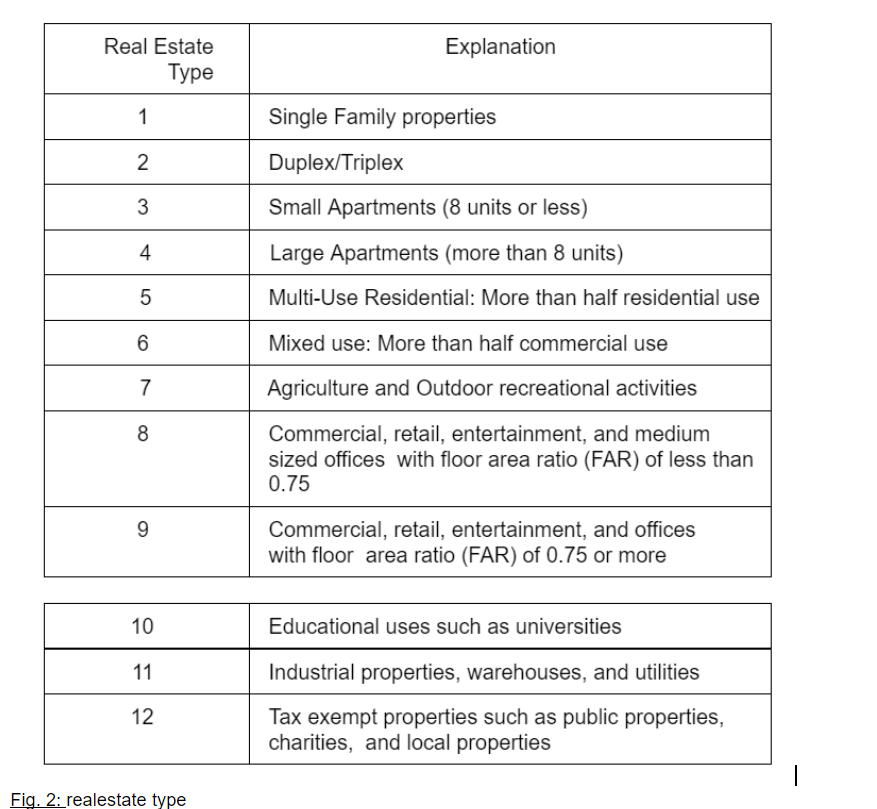

In [ ]:
df['realesttyp'][df['realesttyp'] > 6].describe().round(1)

count    337.0
mean       9.6
std        1.7
min        7.0
25%        8.0
50%        9.0
75%       11.0
max       12.0
Name: realesttyp, dtype: float64

In [ ]:
df['realesttyp'][df['realesttyp'] > 6].value_counts()

8.0     113
12.0     72
9.0      72
11.0     64
7.0      15
10.0      1
Name: realesttyp, dtype: int64

In [6]:
df_non_residential = df[df['realesttyp'] > 6]

In [ ]:
df_non_residential

,Unnamed: 0.1,Join_Count,TARGET_FID,Loc_name,Status,Score,Match_type,Match_addr,User_fld,Addr_type,ARC_Street,ARC_City,ARC_State,ARC_ZIP,case_numbe,court_divi,file_date,initiating,property_a,property_1,property_2,property_3,mapc_id,muni_id,muni,parloc_id,poly_typ,map_num,mappar_id,loc_id_cnt,land_value,bldg_value,othr_value,total_valu,ls_price,ls_date,bldg_area,res_area,luc_1,luc_2,...,owner_addr,owner_city,owner_stat,owner_zip,fy,lot_areaft,far,pct_imperv,pct_bldg,pct_pave,landv_pac,bldgv_psf,totv_pac,bldlnd_rat,sqm_imperv,sqm_bldg,sqm_pave,realesttyp,temp,st_area_sh,st_length_,geometry,CoreName,CleanName,Corp,EntityName,DataID,FEIN,Owner_Groups_All,Only_Groups,index_right,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,0,1,0,MAD_ADDR_POST,M,92.63,A,"159 BROOKLINE ROAD 8, TOWNSEND, MA, 01469",NaN,PointAddress,159 Brookline Road 5,Townsend,MA,1469.0,2048SU000012,ayer district,2020-11-10,Summary Process - Residential (c239),Townsend,MA,159 Brookline Road 5,1469.0,821985,299,Townsend,M_185312_938643,FEE,38,38 9 0,1,83300.0,563900.0,3700.0,650900.0,195500.0,20090831.0,4458.0,4458.0,301,301,...,15 SCALES LANE,TOWNSEND,MA,01469,2019,100017.345642,0.044572,31.934645,4.924409,27.010236,36279.187142,126.491700,2.834829e+05,6.813926,2967.338976,457.571717,2509.767258,8.0,0.0,9291.917091,436.954349,POINT (185305.2413596544 938650.9030090374),KING DANA,KING DANA,False,NaN,NaN,NaN,KING DANA,NaN,1171.0,25.0,17.0,301101.0,1400000US25017301101,2.501730e+10,3011.01,CT,44272760.0,54203.0
6,6,1,6,MAD_ADDR_GEOG,M,92.63,A,"159 BROOKLINE ROAD 8, TOWNSEND, MA, 01469",NaN,PointAddress,159 Brookline Road 9,Townsend,MA,1469.0,2048SU000010,ayer district,2020-11-10,Summary Process - Residential (c239),Townsend,MA,159 Brookline Road 9,1469.0,821985,299,Townsend,M_185312_938643,FEE,38,38 9 0,1,83300.0,563900.0,3700.0,650900.0,195500.0,20090831.0,4458.0,4458.0,301,301,...,15 SCALES LANE,TOWNSEND,MA,01469,2019,100017.345642,0.044572,31.934645,4.924409,27.010236,36279.187142,126.491700,2.834829e+05,6.813926,2967.338976,457.571717,2509.767258,8.0,0.0,9291.917091,436.954349,POINT (185305.2413596544 938650.9030090374),KING DANA,KING DANA,False,NaN,NaN,NaN,KING DANA,NaN,1171.0,25.0,17.0,301101.0,1400000US25017301101,2.501730e+10,3011.01,CT,44272760.0,54203.0
11,11,1,11,MAD_ADDR_GEOG,M,92.63,A,"159 BROOKLINE ROAD 8, TOWNSEND, MA, 01469",NaN,PointAddress,159 Brookline Road Cabin 2,Townsend,MA,1469.0,2048SU000009,ayer district,2020-11-10,Summary Process - Residential (c239),Townsend,MA,159 Brookline Road Cabin 2,1469.0,821985,299,Townsend,M_185312_938643,FEE,38,38 9 0,1,83300.0,563900.0,3700.0,650900.0,195500.0,20090831.0,4458.0,4458.0,301,301,...,15 SCALES LANE,TOWNSEND,MA,01469,2019,100017.345642,0.044572,31.934645,4.924409,27.010236,36279.187142,126.491700,2.834829e+05,6.813926,2967.338976,457.571717,2509.767258,8.0,0.0,9291.917091,436.954349,POINT (185305.2413596544 938650.9030090374),KING DANA,KING DANA,False,NaN,NaN,NaN,KING DANA,NaN,1171.0,25.0,17.0,301101.0,1400000US25017301101,2.501730e+10,3011.01,CT,44272760.0,54203.0
17,17,1,17,MAD_ADDR_POST,M,89.91,M,"159 BROOKLINE ROAD 8, TOWNSEND, MA, 01469",NaN,PointAddress,159 BROOKINE ROAD 8,TOWNSEND,MA,1469.0,2048SU000011,ayer district,2020-11-10,Summary Process - Residential (c239),Townsend,MA,159 Brookine Road 8,1469.0,821985,299,Townsend,M_185312_938643,FEE,38,38 9 0,1,83300.0,563900.0,3700.0,650900.0,195500.0,20090831.0,4458.0,4458.0,301,301,...,15 SCALES LANE,TOWNSEND,MA,01469,2019,100017.345642,0.044572,31.934645,4.924409,27.010236,36279.187142,126.491700,2.834829e+05,6.813926,2967.338976,457.571717,2509.767258,8.0,0.0,9291.917091,436.954349,POINT (185305.2413596544 938650.9030090374),KING DANA,KING DANA,False,NaN,NaN,NaN,KING DANA,NaN,1171.0,25.0,17.0,301101.0,1400000US25017301101,2.501730e+10,3011.01,CT,44272760.0,54203.0
18,18,1,18,MAD_ADDR_POST,M,92.63,M,"20 ROUTE 6A 1, SANDWICH, MA, 02563",NaN,PointAddress,"20 ROUTE 6A, COTTAGE 6",SANDWICH,MA,2563.0,2025SU000058,barnstable district,2020

In [ ]:
df_non_residential['ARC_City'].value_counts()

Worcester       90
Framingham      31
Dorchester      11
Lowell           9
New Bedford      8
                ..
NEW BEDFORD      1
Foxboro          1
Mattapan         1
TOWNSEND         1
South Hadley     1
Name: ARC_City, Length: 90, dtype: int64

In [20]:
df_non_residential['initiating'].value_counts()

Efiled SP Summons and Complaint - Non-payment of Rent    230
Summary Process - Residential (c239)                      44
Efiled SP Summons and Complaint - Cause                   43
SP Summons and Complaint - Non-payment of Rent            11
Efiled SP Summons and Complaint - No Cause                 4
SP Transfer- No Cause                                      1
Efiled SP Summons and Complaint - Foreclosure              1
SP Summons and Complaint - Cause                           1
SP Summons and Complaint - No Cause                        1
SP Transfer - Non-payment of Rent                          1
Name: initiating, dtype: int64

In [21]:
df_non_residential['initiating'][df['realesttyp'] == 12].value_counts()

Efiled SP Summons and Complaint - Non-payment of Rent    46
Efiled SP Summons and Complaint - Cause                  22
Summary Process - Residential (c239)                      2
SP Summons and Complaint - Cause                          1
SP Summons and Complaint - Non-payment of Rent            1
Name: initiating, dtype: int64

In [8]:
df_non_residential['initiating'][df['realesttyp'] == 9].value_counts()

Efiled SP Summons and Complaint - Non-payment of Rent    51
Summary Process - Residential (c239)                     11
Efiled SP Summons and Complaint - Cause                   6
Efiled SP Summons and Complaint - No Cause                2
SP Summons and Complaint - Non-payment of Rent            2
Name: initiating, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 7].value_counts()

0.0    14
9.0     1
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 8].value_counts()

0.0      80
12.0      6
14.0      6
7.0       4
1.0       3
3.0       2
17.0      1
96.0      1
19.0      1
112.0     1
26.0      1
6.0       1
94.0      1
23.0      1
16.0      1
10.0      1
86.0      1
21.0      1
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 9].value_counts()

0.0      65
26.0      4
24.0      2
100.0     1
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 10].value_counts()

0.0    1
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 11].value_counts()

0.0    64
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_units'][df['realesttyp'] == 11].value_counts()

0.0    60
1.0     3
5.0     1
Name: num_units, dtype: int64

In [ ]:
df_non_residential['num_rooms'][df['realesttyp'] == 12].value_counts()

0.0      53
16.0      5
3.0       2
531.0     2
20.0      2
39.0      1
12.0      1
30.0      1
8.0       1
6.0       1
895.0     1
240.0     1
24.0      1
Name: num_rooms, dtype: int64

In [ ]:
df_non_residential['num_units'][df['realesttyp'] == 12].value_counts()

0.0      56
173.0     2
1.0       2
96.0      2
177.0     2
150.0     2
82.0      1
71.0      1
40.0      1
250.0     1
60.0      1
117.0     1
Name: num_units, dtype: int64

# Census Visualizations

In [16]:
# data is now our pandas DataFrame containing all of the data from our csv file
census = pd.read_csv(ROOT_FOLDER + "MA_geographic.csv",index_col=0)

In [17]:
census

,Eviction Numbers,Estimate!!Total:,Estimate!!Total:!!Not Hispanic or Latino:,Estimate!!Total:!!Not Hispanic or Latino:!!White alone,Estimate!!Total:!!Not Hispanic or Latino:!!Black or African American alone,Estimate!!Total:!!Not Hispanic or Latino:!!American Indian and Alaska Native alone,Estimate!!Total:!!Not Hispanic or Latino:!!Asian alone,Estimate!!Total:!!Not Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Not Hispanic or Latino:!!Some other race alone,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:,Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Not Hispanic or Latino:!!Two or more races:!!Two races excluding Some other race, and three or more races",Estimate!!Total:!!Hispanic or Latino:,Estimate!!Total:!!Hispanic or Latino:!!White alone,Estimate!!Total:!!Hispanic or Latino:!!Black or African American alone,Estimate!!Total:!!Hispanic or Latino:!!American Indian and Alaska Native alone,Estimate!!Total:!!Hispanic or Latino:!!Asian alone,Estimate!!Total:!!Hispanic or Latino:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Hispanic or Latino:!!Some other race alone,Estimate!!Total:!!Hispanic or Latino:!!Two or more races:,Estimate!!Total:!!Hispanic or Latino:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Hispanic or Latino:!!Two or more races:!!Two races excluding Some other race, and three or more races"
Muni,,,,,,,,,,,,,,,,,,,,,,
Worcester,576,185143,144633,102148,22594,712,13675,111,1096,4297,426,3871,40510,25894,2010,412,20,0,9131,3043,1240,1803
Boston,483,684379,548622,304524,155096,1376,65613,365,5278,16370,1849,14521,135757,56931,17555,641,594,53,40240,19743,2933,16810
Fall River,354,89388,79968,69030,4729,124,1680,0,741,3664,249,3415,9420,3025,509,0,45,43,5485,313,111,202
New Bedford,293,95239,75413,57575,6051,27,1476,25,6820,3439,1528,1911,19826,2908,585,51,0,0,14755,1527,969,558
Springfield,171,154139,84838,48145,28543,312,3927,11,417,3483,204,3279,69301,49469,3735,366,230,0,12033,3468,1210,2258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stow,1,7133,6929,6307,1,0,250,0,211,160,54,106,204,203,0,0,0,0,1,0,0,0
Halifax,1,7842,7791,7543,182,7,28,0,0,31,0,31,51,0,0,0,0,0,51,0,0,0
Boxborough,1,5561,5279,4080,41,0,1000,0,0,158,0,158,282,173,0,0,0,0,94,15,0,15


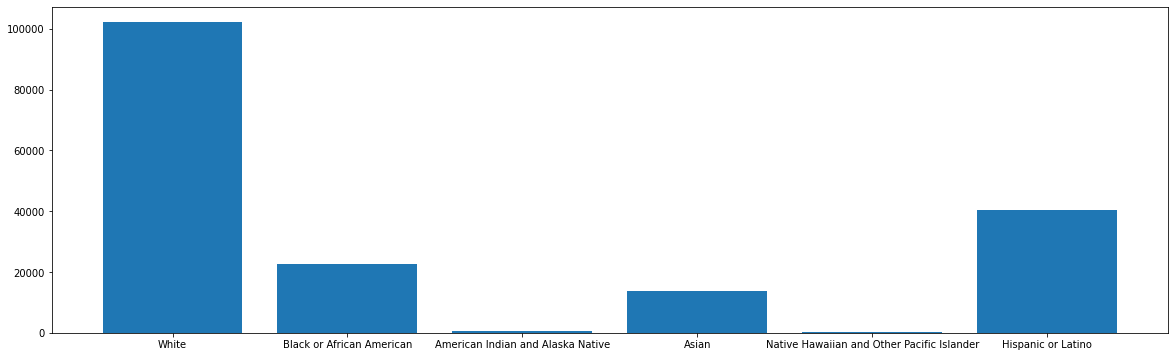

In [9]:
#Worcester
import matplotlib.pyplot as plt

data = {'White': 102148, 'Black or African American': 22594, 'American Indian and Alaska Native': 712, 'Asian': 13675, 'Native Hawaiian and Other Pacific Islander': 111, 'Hispanic or Latino': 40510}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

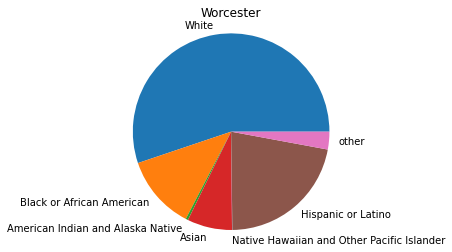

In [20]:
# Data to plot
labels = []
sizes = []
data = {'White': 102148, 'Black or African American': 22594, 'American Indian and Alaska Native': 712, 'Asian': 13675, 'Native Hawaiian and Other Pacific Islander': 111, 'Hispanic or Latino': 40510, 'other': 5393}
for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.title("Worcester")
plt.axis('equal')
plt.show()

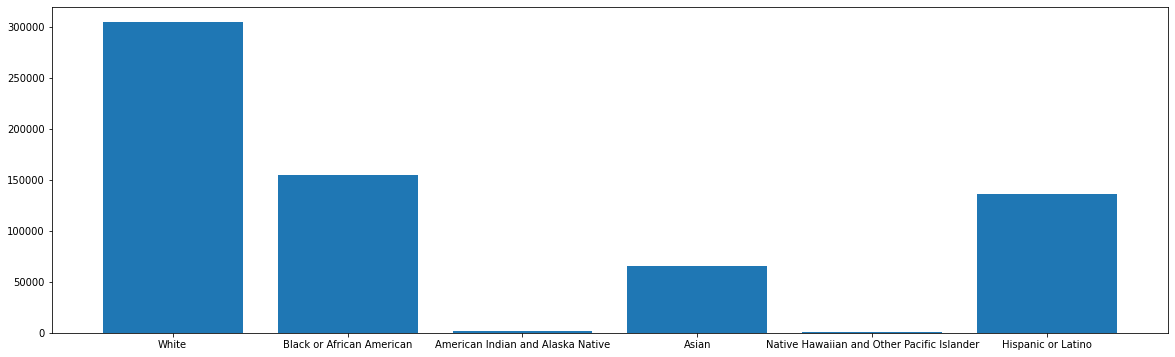

In [13]:
#Boston
import matplotlib.pyplot as plt

data = {'White': 304524, 'Black or African American': 155096, 'American Indian and Alaska Native': 1376, 'Asian': 65613	, 'Native Hawaiian and Other Pacific Islander': 365, 'Hispanic or Latino': 135757}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

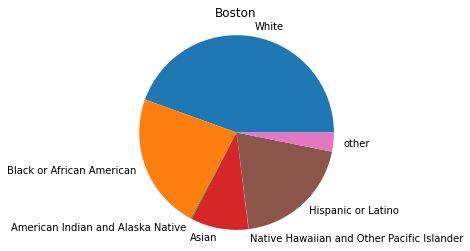

In [21]:
# Data to plot
labels = []
sizes = []
data = {'White': 304524, 'Black or African American': 155096, 'American Indian and Alaska Native': 1376, 'Asian': 65613	, 'Native Hawaiian and Other Pacific Islander': 365, 'Hispanic or Latino': 135757, 'other': 21648}
for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.title("Boston")
plt.axis('equal')
plt.show()

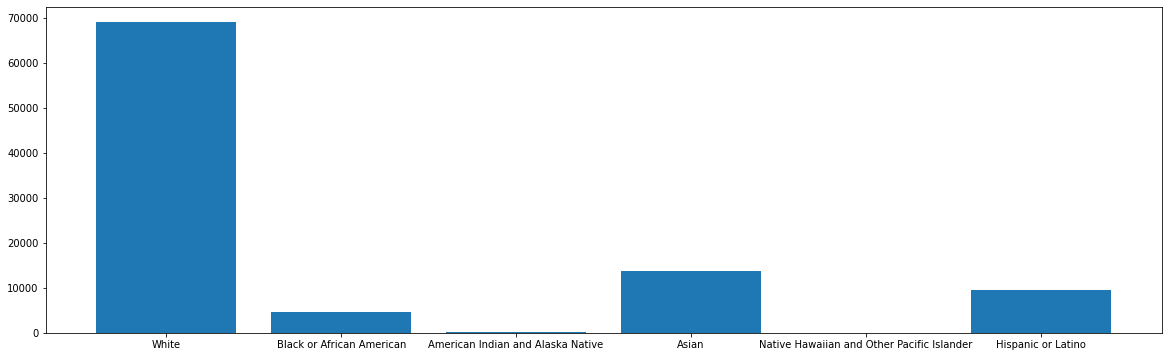

In [12]:
#Fall River
import matplotlib.pyplot as plt

data = {'White': 69030, 'Black or African American': 4729, 'American Indian and Alaska Native': 124, 'Asian': 13675, 'Native Hawaiian and Other Pacific Islander': 0, 'Hispanic or Latino': 9420, 'other': 4405}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

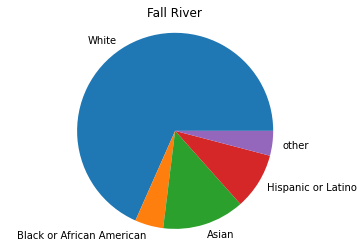

In [25]:
# Data to plot
labels = []
sizes = []

data = {'White': 69030, 'Black or African American': 4729, 'Asian': 13675, 'Hispanic or Latino': 9420, 'other': 4123}
for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.title("Fall River")
plt.axis('equal')
plt.show()

Plots on top three cities based on density

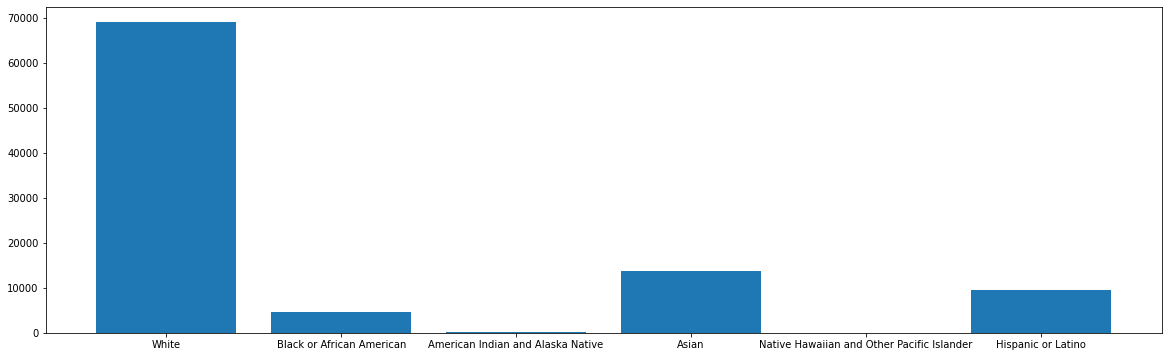

In [13]:
#Fall River
import matplotlib.pyplot as plt

data = {'White': 69030, 'Black or African American': 4729, 'American Indian and Alaska Native': 124, 'Asian': 13675, 'Native Hawaiian and Other Pacific Islander': 0, 'Hispanic or Latino': 9420}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

<BarContainer object of 6 artists>

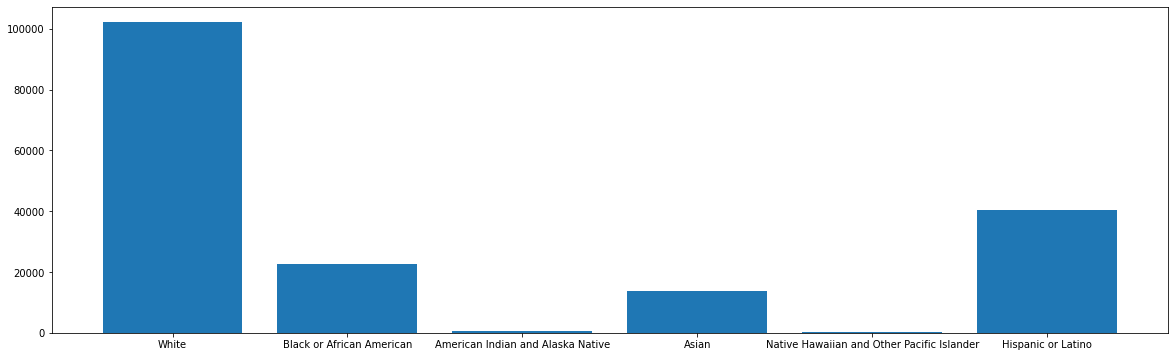

In [15]:
#Worcester
import matplotlib.pyplot as plt

data = {'White': 102148, 'Black or African American': 22594, 'American Indian and Alaska Native': 712, 'Asian': 13675, 'Native Hawaiian and Other Pacific Islander': 111, 'Hispanic or Latino': 40510}
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)

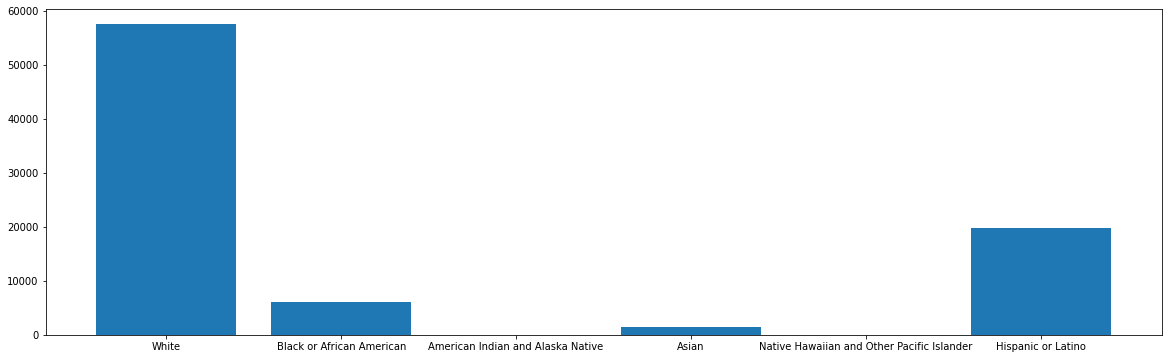

In [17]:
#New Bedford
import matplotlib.pyplot as plt

data = {'White': 57575, 'Black or African American': 6051, 'American Indian and Alaska Native': 27, 'Asian': 1476, 'Native Hawaiian and Other Pacific Islander': 25, 'Hispanic or Latino': }
names = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20, 6))
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

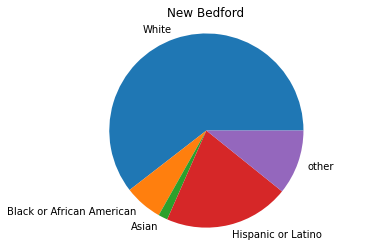

In [26]:
# Data to plot
labels = []
sizes = []
data = {'White': 57575, 'Black or African American': 6051, 'Asian': 1476, 'Hispanic or Latino': 19826, 'other': 10259}
for x, y in data.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.title("New Bedford")
plt.axis('equal')
plt.show()